# **Градиент и градиентный спуск**

В предыдущем юните мы познакомились с таким важным понятием математического анализа, как градиент. Теперь можно разбираться, как работает **алгоритм градиентного спуска**.

Попробуйте представить функцию f(x,y), которая визуализируется в виде неоднородной, «холмистой» поверхности:

![](https://lms.skillfactory.ru/assets/courseware/v1/479402be12257a1f1a01d8269efd6f5b/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_1.png)

В предыдущем юните мы узнали, что градиент, вычисленный в любой точке, по сути, представляет собой направление самого крутого подъёма на таком ландшафте. Это может натолкнуть на идею о том, как мы могли бы максимизировать функцию: встать на случайную точку и столько раз, сколько сможем, сделать небольшой шаг в направлении градиента, чтобы двигаться в гору. Другими словами, мы будем пытаться подняться на самый высокий холм, двигаясь по самому крутому подъёму вверх в каждой точке.

Чтобы минимизировать функцию, можно следовать направлению антиградиента и таким образом двигаться в сторону самого крутого спуска, то есть в каждой точке находить направление самого крутого склона вниз и идти по нему.

Обдумайте эту идею, она должна быть интуитивно понятна: *если мы стоим на на краю оврага и хотим спуститься вниз как можно быстрее (и если мы не боимся упасть), то будем пытаться спускаться по самым крутым склонам, а не идти долгим путём по более пологим.*

Ровно так и работает алгоритм градиентного спуска. Он стартует с некоторой точки ландшафта и всё время двигается по самому крутому направлению вниз, то есть по **антиградиенту**.

Формально можно записать, что для того, чтобы попасть в следующую точку x1, необходимо перейти из начальной точки x0 на антиградиент, домноженный на некоторый коэффициент, который называется **шагом градиентного спуска** или **темпом обучения** — о нём мы поговорим немного позже.

![](data/48.PNG)

В более общем виде формула будет выглядеть следующим образом:

![](data/49.PNG)

Так, шаг за шагом, мы движемся в направлении антиградиента, пока не найдём локальный минимум. Этот процесс может занять тысячи итераций, поэтому мы, разумеется, обычно реализуем градиентный спуск с помощью компьютера.

Рассмотрим пример, чтобы лучше понять принцип работы градиентного спуска на конкретной функции — ![](data/50.PNG)

Визуально её можно представить следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/0200393dc4d01fe85aac8dcb9dece853/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_2.png)

Как видно из графика, данная функция имеет много локальных минимумов (4).

In [2]:
from sympy import *
x = Symbol("x",Real=true)
expr = ((x**2)*cos(x)-x)/10
y = expr.diff(x)

solveset(Eq(y, 0), x) # чорти што

ConditionSet(x, Eq(-x**2*sin(x)/10 + x*cos(x)/5 - 1/10, 0), Complexes)

Интересная особенность градиентного спуска в том, что он найдёт разные минимумы в зависимости от того, с какой точки мы начнём и какой размер шага выберем.

Например, пусть мы выбрали первоначальную точку x0 = 6, а в качестве шага взяли 0.2. Тогда через десять шагов мы окажемся в точке x1 = 4:

![](https://lms.skillfactory.ru/assets/courseware/v1/7afc9481ea2f152e9974b786c61d37e6/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_3.png)

Если мы начнём движение из той же самой точки, однако выберем размер шага, равный , окажется, что шаг слишком большой для того, чтобы наш алгоритм сошёлся в минимуме:

![](https://lms.skillfactory.ru/assets/courseware/v1/f50616786f0d96955883a5507e523e3d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_4.png)

Если же мы начнём с точки x0 = 7, а в качестве шага выберем значение 0.2, то в итоге попадём в совершенно иной минимум:

![](https://lms.skillfactory.ru/assets/courseware/v1/e681f97fea9fd5c1423a64ebd76978e0/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_5.png)
***

Итак, мы немного познакомились с тем, как происходит поиск минимума при применении алгоритма градиентного спуска, и заметили, что у него есть явные недостатки, которые необходимо учитывать.

* Одним из ограничений алгоритма градиентного спуска является то, что он находит **только локальные минимумы**. Как только алгоритм находит некоторую точку, которая находится на локальном минимуме, то «застревает» в ней. С этим можно бороться: запускать алгоритм из разных точек и сравнивать результаты, варьировать длину шага (темп обучения), но попадание в глобальный минимум всё равно не гарантировано.

* Градиентный спуск **не различает глобальные и локальные минимумы**. Даже если мы и попадём случайно в глобальный минимум, удачно выбрав точку, то всё равно не узнаем о том, что мы попали в глобальный минимум, так как никак не сможем определить его.

* Другое ограничение градиентного спуска касается размера шага. Если мы **задаём оптимальный размер шага** (который можно подобрать экспериментально), то алгоритм сходится и мы попадаем в минимум.

![](https://lms.skillfactory.ru/assets/courseware/v1/83ea5debefd0412e4b8e00b24c561999/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_6.png)

    Однако если размер шага слишком велик, алгоритм может никогда не сойтись к локальному минимуму, так как каждый раз будет «перепрыгивать» его.

![](https://lms.skillfactory.ru/assets/courseware/v1/0ad778c9d991e01a196ac63109e89c87/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_7.png)

    Если нам повезёт и алгоритм всё же сойдётся в такой ситуации, он всё равно может сделать больше шагов, чем нужно:

![](https://lms.skillfactory.ru/assets/courseware/v1/92181e97da7942742742788d353be3a0/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_8.png)

А в случае очень маленького размера шага потребуется слишком много шагов:

![](https://lms.skillfactory.ru/assets/courseware/v1/f0f38073e20ca2ebf68169b04c369a50/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_9.png)

* Градиентный спуск работает только тогда, когда **функция дифференцируема везде**. В противном случае мы можем прийти к точке, где градиент не определён, и тогда мы не сможем использовать формулу для поиска новой точки.

![](https://lms.skillfactory.ru/assets/courseware/v1/53ef4ff997668cc95d298dec1ecb3ca0/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_10.png)
***
**Резюмируем ↓**

* Градиентный спуск минимизирует дифференцируемые функции с любым количеством переменных. Он делает это, стартуя из случайной точки и далее двигаясь с заданным шагом в направлении антиградиента.
* Градиентный спуск не может определить, является найденный минимум локальным или глобальным. 
* Размер шага определяет, быстро или медленно алгоритм сходится к минимуму или расходится.

Мы разобрались с тем, как работает градиентный спуск в теории. Теперь давайте рассмотрим визуализацию данного процесса. Определим простейшую выпуклую функцию. В ней нет ничего особенного, но она очень удобна в визуальном плане:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2)**3 + b * (y ** 2)**2

In [5]:
# Определим функцию, которая вычислит градиент:

def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [6]:
# Также запрограммируем простейший вариант для градиентного спуска:

def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [7]:
# Напишем функцию, которая будет строить график:

def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

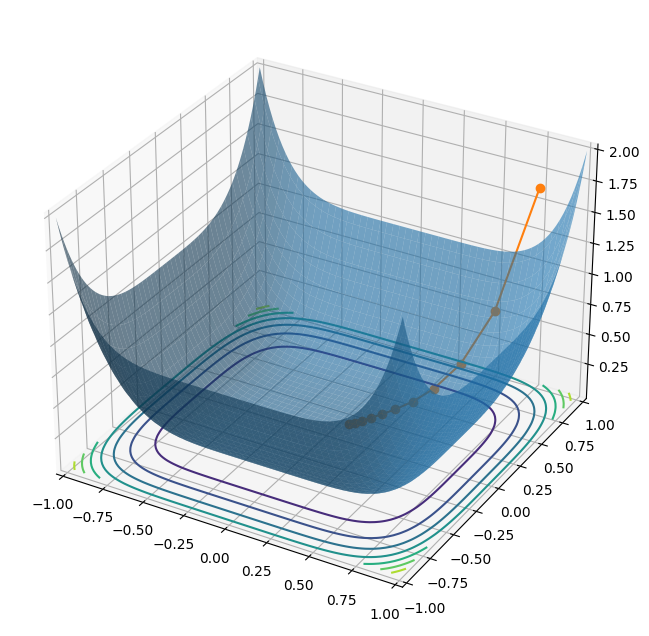

In [8]:
# Визуализируем и получим следующее движение градиентного спуска к минимуму:

trace = grad_descend(grad, 0.1, 10)
plot_grad(fun, trace = trace)

***
## **ГРАДИЕНТНЫЙ СПУСК С MOMENTUM**

Поговорим об усовершенствованном варианте градиентного спуска , который носит название **«градиентный спуск с momentum»**. Это не единственный вид градиентного спуска, но один из самых известных. Про все остальные виды мы ещё поговорим в дальнейшем.

Заметим, что для ускорения спуска было бы неплохо учитывать изменения на предыдущем шаге. На примере ниже мы видим, как алгоритм колеблется в разные стороны вокруг одной прямой. Было бы здорово явно указать алгоритму держаться ближе к прямой и двигаться вдоль неё.

![](https://lms.skillfactory.ru/assets/courseware/v1/9adbdb3d799afde8d4061a5686f1b0a7/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_12.png)

Решить эту проблему как и позволяет градиентный спуск с momentum. Формально его можно определить следующим образом:

![](data/51.PNG)

Вы можете заметить, что формула осталась той же, но справа прибавилось ещё одно слагаемое, зависящее от разницы координат текущей и предыдущей точек.

Идея заключается в том, что на каждой итерации градиентного спуска x изменяется градиент, помноженный не только на темп обучения, но и на вектор, на который мы передвинулись в предыдущем шаге, с некоторым коэффициентом.

В формуле выше α — это параметр, который показывает, насколько учитывается предыдущий шаг.

Для прошлого примера это работает так: точка начинает двигаться вдоль прямой (которую можно представить, если соединить точки A и Local Optima), ведущей к локальному минимуму.

![](https://lms.skillfactory.ru/assets/courseware/v1/3a2239242e607d99ccd0d83e5ca4531d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md5_7_13.png)

Это помогает ускорить сходимость алгоритма. В целом, это лишь одна из вариаций алгоритма градиентного спуска, и мы можем использовать её для увеличения качества. Ограничения тут ровно такие же, как и у обычного градиентного спуска. Нельзя утверждать, что этот метод всегда лучше других в тех или иных ситуациях — это просто ещё один инструмент, которым можно пользоваться при решении задач.

Итак, мы познакомились с алгоритмом градиентного спуска и разобрали принцип его работы. Теперь, когда теоретическая база подготовлена, осталось повторить пройденное и перейти к следующему юниту, чтобы уже использовать градиентный спуск для решения практической задачи — прогнозирования объёмов продаж в рамках решения задачи линейной регрессии.

In [15]:
# Найдите следующую точку градиентного спуска для функции  ,
# если текущая точка — , . Введите координаты получившейся точки:

import warnings
warnings.simplefilter('ignore')
x,y,z=symbols('x y z')
x_current = np.array([0,0,0]) # точка, где мы находимся
f = 2*x**2 - 4*x*z + 4*y**2 - 8*y*z + 9*z**2 + 4*x + 8*y - 20*z
f_diff_x = f.diff(x)
f_diff_y = f.diff(y)
f_diff_z = f.diff(z)
x_sol = f_diff_x.subs([(x,0),(y,0),(z,0)])
y_sol = f_diff_y.subs([(x,0),(y,0),(z,0)])
z_sol = f_diff_z.subs([(x,0),(y,0),(z,0)])
gradient = np.array([x_sol,y_sol,z_sol]) # вектор градиентов (производные по всем переменным в 0)

# по формуле градиентного спуска ищем разность координат текущей точки
# с координатами градиента умноженными на шаг градиента
x_next = simplify(x_current - 0.25*gradient)
x_next

[-1.0, -2.0, 5.0]